In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from ast import literal_eval
%matplotlib inline

In [2]:
# load the pre-calculated cluster/super cluster assignments for all Kadist tagged works
df = pd.read_csv('results/kadist_assignments.csv')

# convert list coluumns to actual lists
for col in [
        'machine_tags', 'user_tags', 'user_superclusters_formatted', 
        'user_superclusters_no_scores','user_clusters_formatted', 'user_clusters_no_scores',
        'machine_superclusters_formatted', 'machine_superclusters_no_scores',
        'machine_clusters_formatted', 'machine_clusters_no_scores'
    ]:
    df[col] = df[col].apply(lambda x: literal_eval(x))

df.head()


,artist_name,description,artist_description,title,region,machine_tags,user_tags,image_url,thumbnail,permalink,...,user_clusters_no_scores,user_clusters_sum_of_scores,machine_superclusters_formatted,machine_superclusters_no_scores,machine_superclusters_sum_of_scores,machine_clusters_formatted,machine_clusters_no_scores,machine_clusters_sum_of_scores,superclusters_fmeasure,clusters_fmeasure
0,Allora & Calzadilla,This series of photographs is part of the body...,Jennifer Allora and Guillermo Calzadilla compr...,Land Mark (Foot Prints) #12,Americas,"[land.n.01, mark.n.01, militant.n.01, protest....","[demobilization.n.01, landscape.n.03, footprin...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/land-mark-foot-prints-12/,...,"[Arts, Inequality, Land]",6.730392,"[Cultural/27.17207482060424, Individual_Person...","[Cultural, Individual_Personal, Politics]",50.807459,"[Arts/5.534640522875817, Fantasy/4.97575757575...","[Arts, Fantasy, Technology]",15.091280,0.666667,0.333333
1,Gabriel Kuri,Gabriel Kuri has created a series of works in ...,"Gabriel Kuri works from repurposed natural, in...",Untitled (Ticket Roll),Unspecified,"[elements.n.01, ephemeral.s.01, keep.v.01, spe...","[everyday.s.03, ostentatious.a.01, juxtapositi...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/untitled-ticket-roll/,...,"[Immaterial, Time, Community]",2.800000,"[Cultural/13.652986066221365, Material_Physica...","[Cultural, Material_Physical, Society]",27.364097,"[Arts/9.029054442289736, Materiality/4.0692307...","[Arts, Materiality, Economy]",15.470080,0.666667,0.000000
2,Renee Rhodes,The artist writes about her work: “There is an...,Renée Rhodes grew up amidst the fantasy and ri...,Moving Clocks Change Rhythm,Americas,"[dance.n.01, district.n.01, technology.n.01, b...","[map.v.02, choreography.n.02, perspective.n.02...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/moving-clocks-change-r...,...,"[Arts, Mind, Language]",9.007629,"[Cultural/36.237697089632086, Individual_Perso...","[Cultural, Individual_Personal, Material_Physi...",87.484475,"[Arts/12.722334021327832, Emotion/12.381618381...","[Arts, Emotion, Land]",34.424674,0.666667,0.333333
3,Fiamma Montezemolo,Montemozolo writes of the work: “Fireflies is ...,"Born in Rome, Fiamma Montezemolo is both a cul...",Fireflies,Americas,"[resistance.n.01, association.n.01, concept.n....","[survival.n.01, adjust.v.03, surprise.n.02, ca...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/fireflies/,...,"[Body, Time, Materiality]",5.898901,"[Individual_Personal/12.725274725274726, Polit...","[Individual_Personal, Politics, Cultural]",29.137341,"[Values/5.104761904761904, Time/3.468797868797...","[Values, Time, Geopolitics]",11.776174,0.333333,0.333333
4,Mladen Stilinovic,The Exploitation of the Dead cycle is composed...,Mladen Stilinovic’s work is based on social an...,Exploitation of the Dead,Europe,"[repeat.n.01, lose.v.01, sign.n.01, colors.n.0...","[obsoleteness.n.01, meaning.n.01, collection.n...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/exploitation-of-the-dead/,...,"[Arts, Design, Media]",4.255392,"[Individual_Personal/16.725621746674385, Cultu...","[Individual_Personal, Cultural, Material_Physi...",35.779726,"[Values/5.12967032967033, Mind/5.1076923076923...","[Values, Mind, Time]",14.607992,1.000000,0.000000


# Breakdown by superclusters & clusters 


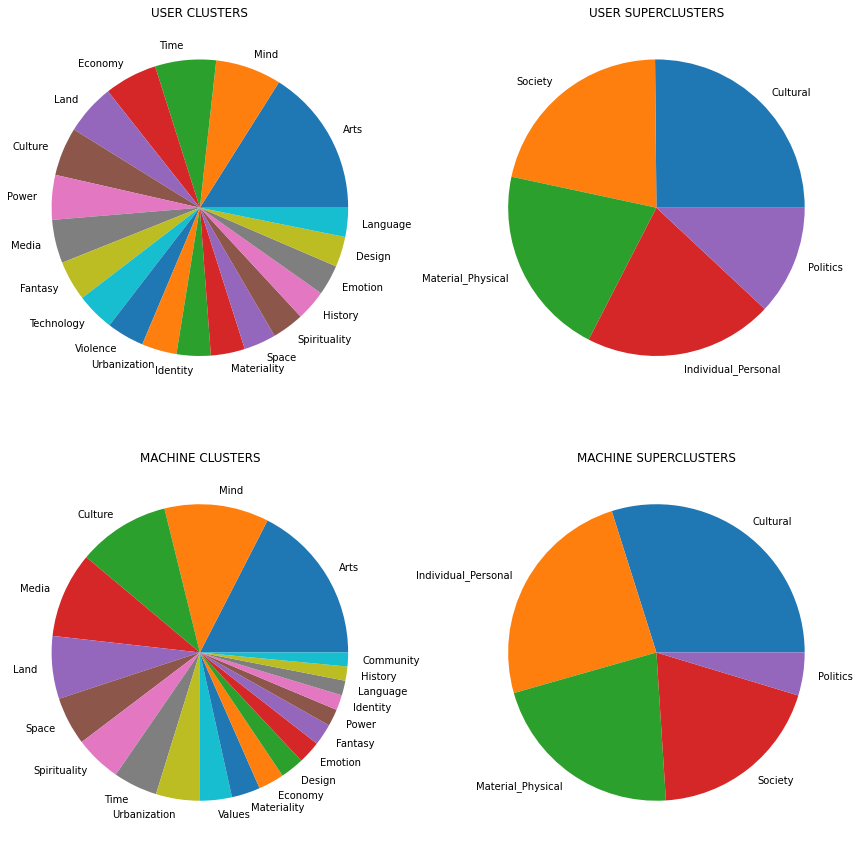

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))

for i, tpe in enumerate(['user', 'machine']): 
    for j, cluster_type in enumerate(['clusters', 'superclusters']):
        axs[i,j].axis('off')
        axs[i,j].set_title("{} {}".format(tpe, cluster_type).upper())

        pd.Series(df['{}_{}_no_scores'.format(tpe, cluster_type)].sum()).value_counts()[:20].plot.pie(ax=axs[i,j]);


# F-Measure Score Distribution

clusters mean f-measure: 0.24118143459915614 hit percentage: 53.65461847389558
superclusters mean f-measure: 0.6735021097046414 hit percentage: 94.29718875502007


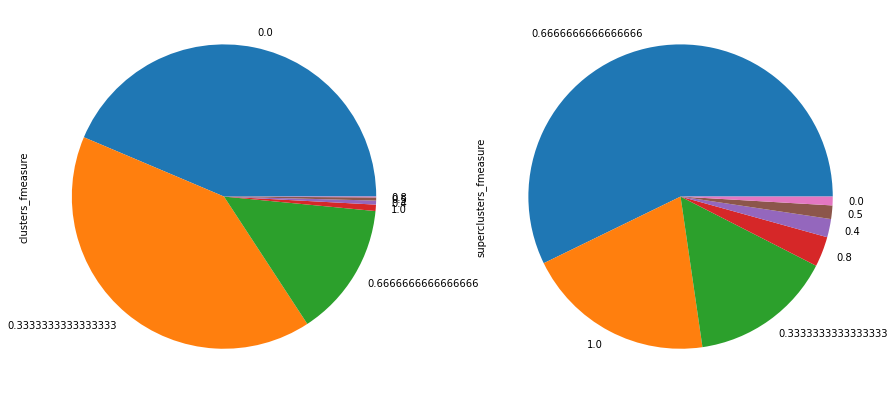

In [4]:
fig, axs = plt.subplots(1,2, figsize=(15,7.5))
for j, cluster_type in enumerate(['clusters', 'superclusters']):
    df['{}_fmeasure'.format(cluster_type)].value_counts().plot.pie(ax=axs[j]);

for j, cluster_type in enumerate(['clusters', 'superclusters']):
    s = df['{}_fmeasure'.format(cluster_type)]
    print(cluster_type, 
          'mean f-measure:', 
          s.mean(),
          'hit percentage:',
          100*s.where(s>0).count()/len(s)
    )


# Analysis of poor performing tags

Most popular tags that produce low cluster scores, ie have low affinity to any cluster

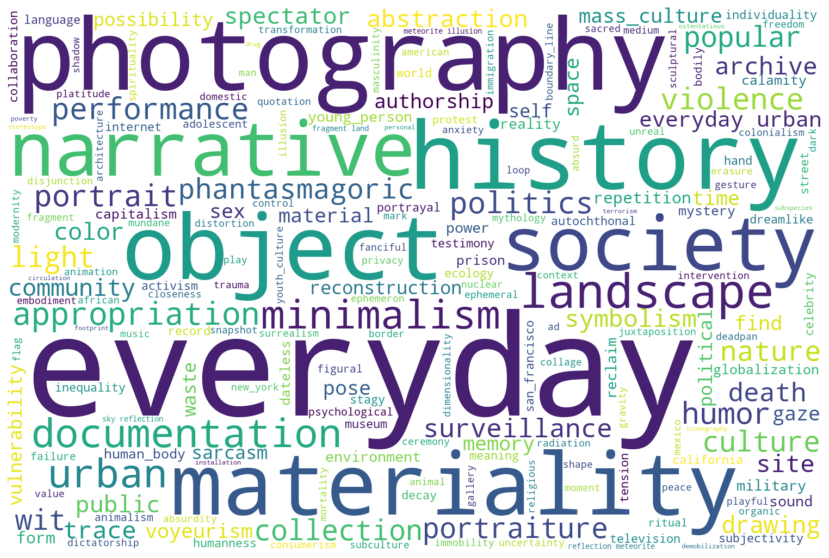

In [5]:
df_low_corr_works = df[df.user_clusters_sum_of_scores < df.user_clusters_sum_of_scores.mean()/1.414]

tags = df_low_corr_works.user_tags.sum()

wc = WordCloud(
    background_color='white',
    colormap = 'viridis',
    width=1500, 
    height=1000, 
    random_state=42).generate(' '.join([x.split('.')[0] for x in tags]))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
pd.Series(tags).value_counts().head(15)

everyday.s.01         36
object.n.01           14
society.n.01          14
photography.n.01      13
history.n.01          12
everyday.s.03         12
urban.a.01            12
appropriation.n.03    11
minimalism.n.01       11
materiality.n.02      11
documentation.n.01    11
violence.n.01         10
politics.n.01         10
narrative.n.01        10
collection.n.01        9
dtype: int64

# Artists that are cluster outliers

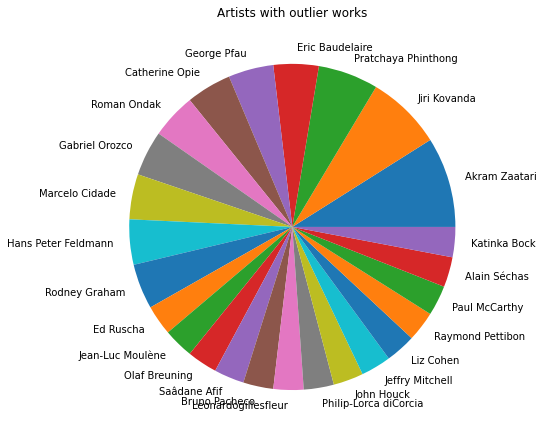

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize=(7.5,7.5))

ax1.axis("off")
ax1.set_title('Artists with outlier works')

df_low_corr_works.artist_name.value_counts()[:25].plot.pie(ax=ax1);

In [8]:
df_low_corr_works.artist_name.value_counts()

Akram Zaatari           6
Jiri Kovanda            5
Pratchaya Phinthong     4
Eric Baudelaire         3
George Pfau             3
                       ..
Hamra Abbas             1
Lynn Hershman Leeson    1
Thomas Demand           1
Jeff Wall               1
Taiyo Kimura            1
Name: artist_name, Length: 288, dtype: int64

## Average clusters_fmeasure by region

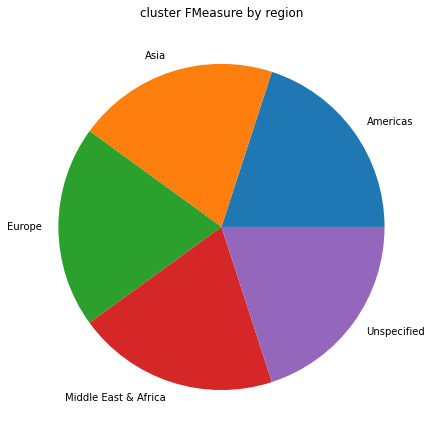

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize=(7.5,7.5))

ax1.axis("off")
ax1.set_title('cluster FMeasure by region')

means = df['clusters_fmeasure'].groupby(df.region).mean()
means.value_counts().plot.pie(ax=ax1, labels=means.index);